# <center>Multiple Linear Regression</center>


#### About this Notebook
In this notebook, we learn how to use scikit-learn to implement Multiple linear regression.


**$$ \ y =  \beta_1 x_1 + \beta_2 x_2 + \beta_3  x_3 + \beta_0 \ $$**

 We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, Evaluate your model using test set, and finally use model to predict unknown value


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import seaborn as sns
import numpy as np
%matplotlib inline


## Understanding the Data

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


$$ \ y =  \beta_1 x_1 + \beta_2 x_2 + \beta_3  x_3 + \beta_0 \ $$



In [2]:
df = pd.read_csv("Datasets/FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


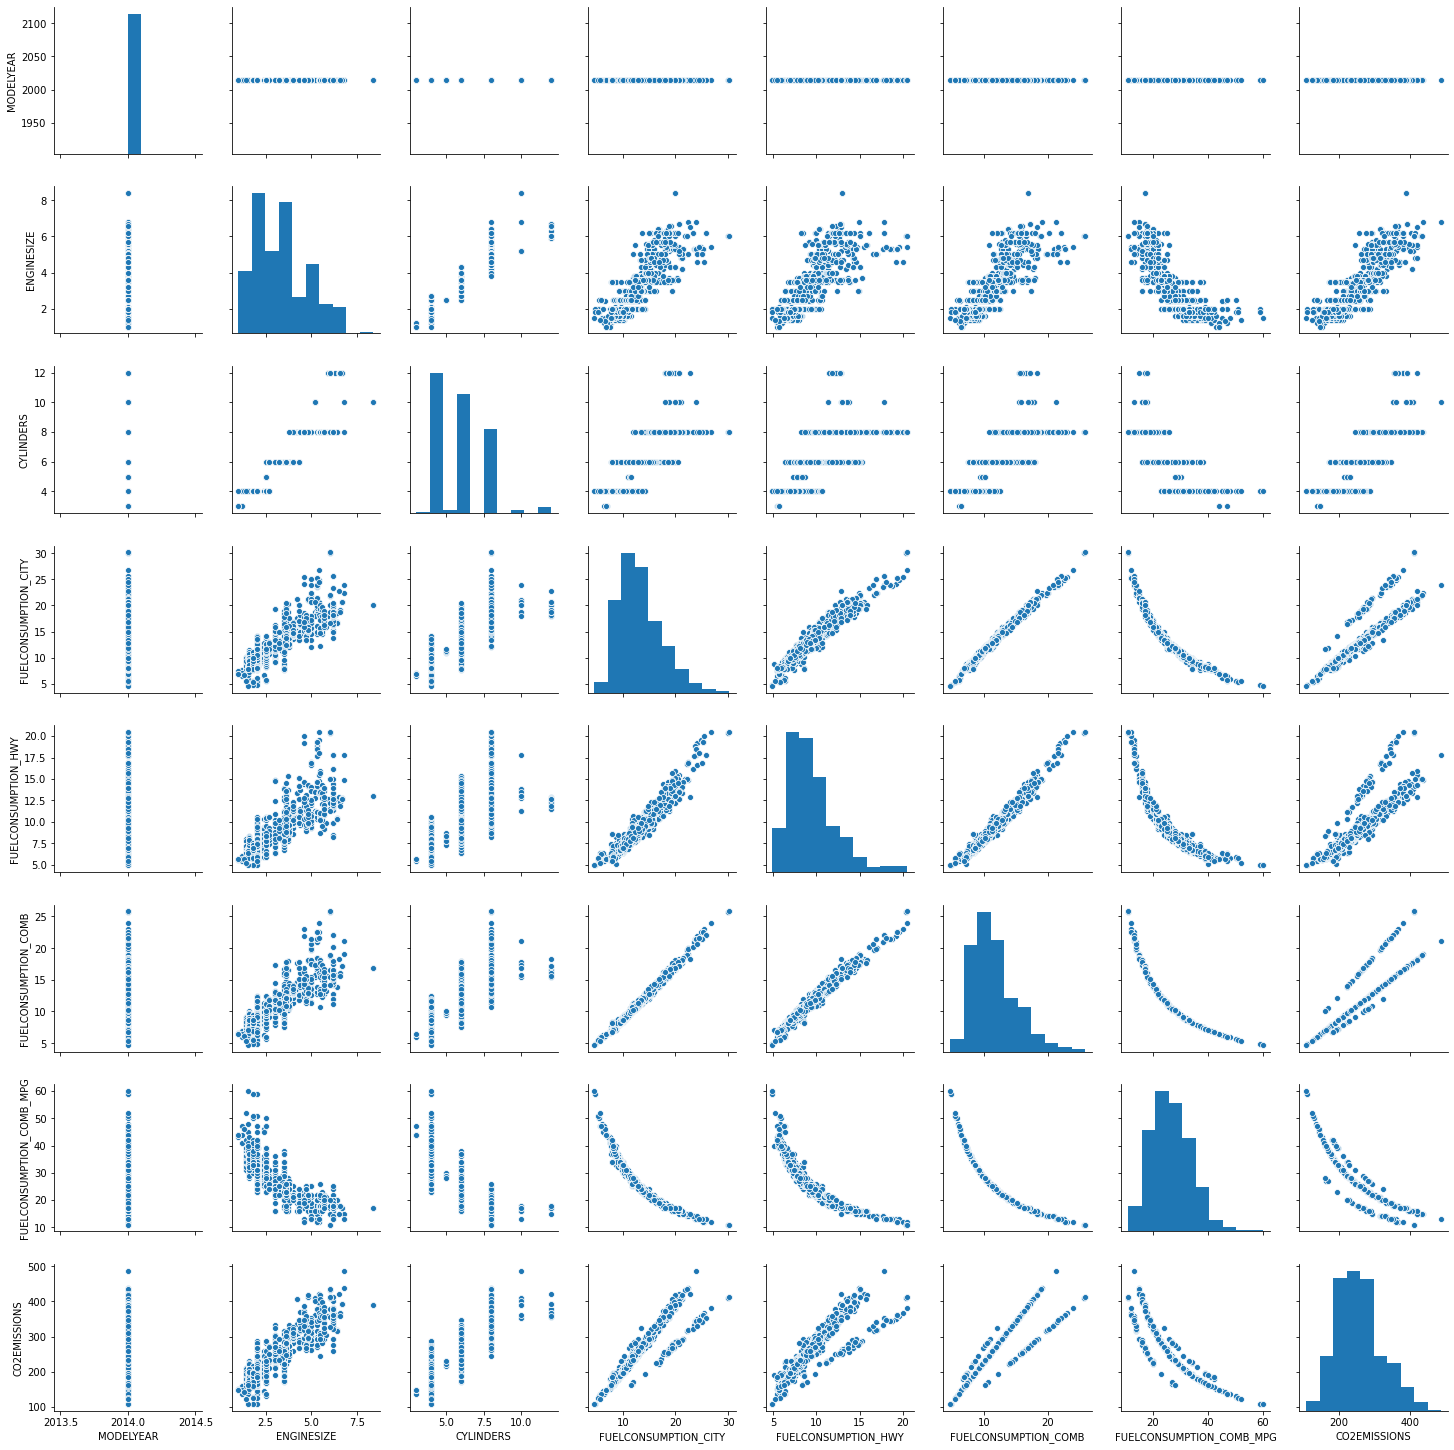

In [3]:
sns.pairplot(df)

In [4]:
Data = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
Data.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


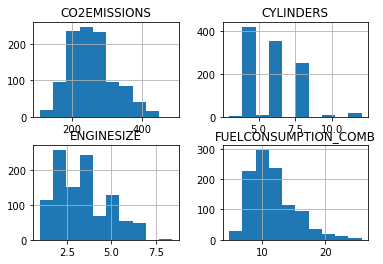

In [5]:
viz = Data[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

<img src='images/Dataset.png'/>

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.
<img src='images/SLR_TRAIN_TEST.png'/>

In [6]:
X = Data[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB']]
X.head()

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_COMB
0,4,2.0,8.5
1,4,2.4,9.6
2,4,1.5,5.9
3,6,3.5,11.1
4,6,3.5,10.6


In [7]:
Y = Data[['CO2EMISSIONS']]
Y.head()

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [21]:
x_train.shape

(746, 3)

In [22]:
x_test.shape

(321, 3)

In [23]:
y_train.shape

(746, 1)

In [24]:
y_test.shape
y_test

,CO2EMISSIONS
316,202
671,297
186,271
170,260
726,242
...,...
763,256
362,346
446,362
772,327


In [25]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [26]:
regr.fit(x_train,y_train)

LinearRegression()

In [27]:
regr.coef_

array([[ 7.07413835, 11.69244292,  9.39071247]])

In [28]:
regr.intercept_

array([67.0393565])

In [29]:
new_predict = regr.predict(x_test)
new_predict

array([[206.03604263],
       [298.55789158],
       [262.38738824],
       [257.69203201],
       [249.01021774],
       [180.91129201],
       [250.17946203],
       [261.67849004],
       [212.62792043],
       [249.94928899],
       [208.87163544],
       [369.90892728],
       [290.08787129],
       [358.39152021],
       [227.65306038],
       [330.41279771],
       [215.4267551 ],
       [208.85325638],
       [321.77904985],
       [247.85935252],
       [212.60954136],
       [310.28709263],
       [209.08342942],
       [212.62792043],
       [261.00634997],
       [223.62984422],
       [199.48092297],
       [261.448317  ],
       [231.89514132],
       [339.80351018],
       [186.35230458],
       [261.21814395],
       [264.26553074],
       [298.57627064],
       [242.22492503],
       [253.93574702],
       [310.9592327 ],
       [193.3861494 ],
       [240.55857652],
       [191.02928175],
       [254.39609311],
       [309.34095059],
       [211.68884918],
       [223

In [30]:
Train_Score = regr.score(x_train,y_train)
Train_Score

0.8681373964996071

In [31]:
Test_score = regr.score(x_test,y_test)
Test_score

0.8534553691907878

In [32]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [33]:
print("R2_Values",r2_score(y_test,new_predict))

R2_Values 0.8534553691907878


In [34]:
print("Mean_Abolute_Error is:",mean_absolute_error(y_test,new_predict))

Mean_Abolute_Error is: 17.45220450720868


In [35]:
print("mean_squared_error is:",mean_squared_error(y_test,new_predict))

mean_squared_error is: 571.5359582584434


### Cross-validation 
● Model performance is dependent on way the data is split 

● Not representative of the model’s ability to generalize 

● Solution: Cross-validation

<img src='images/Cross_validation.png'/>

In [36]:
from sklearn.model_selection import cross_val_score ,cross_val_predict

In [37]:
cv_results = cross_val_score(regr, x_train, y_train, cv=50) 
cv_results

array([0.90314965, 0.71250338, 0.86285762, 0.88314506, 0.84074107,
       0.74756255, 0.92572038, 0.7533851 , 0.91070873, 0.88013072,
       0.80266108, 0.89131795, 0.86683953, 0.84589043, 0.90753143,
       0.81832511, 0.92895738, 0.92633021, 0.78814227, 0.82710226,
       0.84768907, 0.82527675, 0.90282941, 0.89460662, 0.78643481,
       0.85474854, 0.88460184, 0.90190999, 0.77841572, 0.84505708,
       0.87084504, 0.82123574, 0.87102715, 0.9207281 , 0.79795067,
       0.90230897, 0.74642499, 0.83108318, 0.81405814, 0.93829406,
       0.90524711, 0.88890413, 0.73092495, 0.89501202, 0.82729633,
       0.90617581, 0.68381504, 0.88776707, 0.91717193, 0.7754084 ])

In [38]:
np.mean(cv_results)

0.8495250112177924

In [39]:
np.max(cv_results)

0.9382940611161726

In [40]:
np.min(cv_results)

0.6838150385504258

In [41]:
CVP = cross_val_predict(regr, x_train, y_train, cv=10)
CVP[0:5]

array([[304.21236465],
       [218.37695134],
       [205.40125428],
       [187.61331308],
       [251.286553  ]])

In [42]:
regr.predict([[2.0,4,8.5]])

array([[207.77846087]])